pip install git+https://github.com/chengjun/flownetwork.git


In [1]:
%matplotlib inline
from flownetwork import flownetwork3 as fn
from flownetwork import flownetwork as fn2

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
fn.__version__

'$version = py3.0.1$'

# Example

In [2]:
G = nx.DiGraph()
G.add_edge(1, 2, weight = 50)
G.add_edge(1, 3, weight = 30)
G.add_edge(3, 2, weight = 10)
G.add_edge(2, 4, weight = 20)
G.add_edge(2, 5, weight = 30)
G.add_edge(5, 3, weight = 5)
G.add_edge(4, 5, weight = 10)

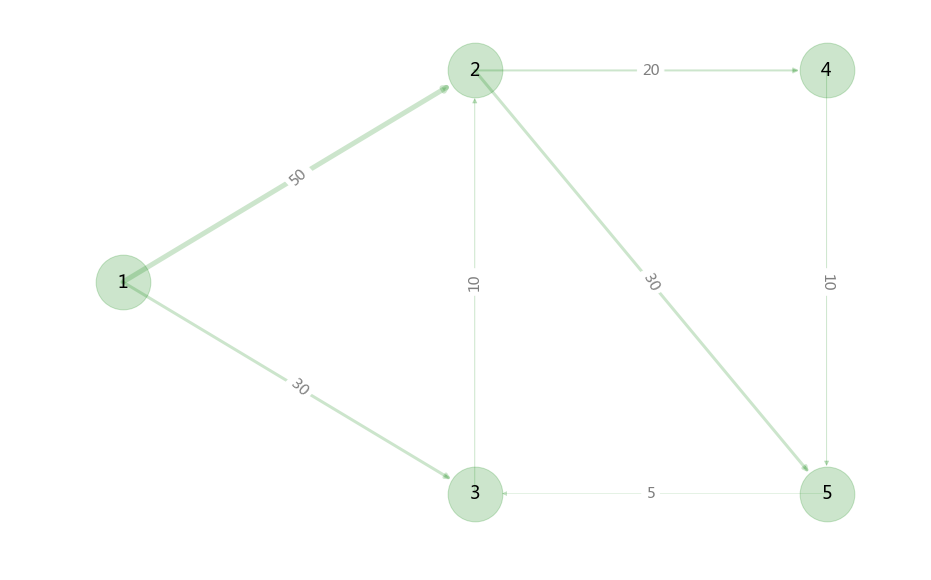

In [3]:
fig = plt.figure(figsize=(16, 10),facecolor='white')     
pos={1: np.array([ 0.2,  0.5]),
 2: np.array([ 0.4,  0.8]),
 3: np.array([ 0.4,  0.2 ]),
 4: np.array([ 0.6,  0.8]),
 5: np.array([ 0.6,  0.2])}

width=[float(d['weight']*.1) for (u,v,d) in G.edges(data=True)]
edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, font_size = 15,alpha = .5)
nx.draw(G, pos, node_size = 3000, node_color = 'green', 
        alpha = 0.2, width = width, edge_color='green',style='solid')
nx.draw_networkx_labels(G,pos,font_size=18)
plt.show() 

In [6]:
H = fn.flowBalancing(G)

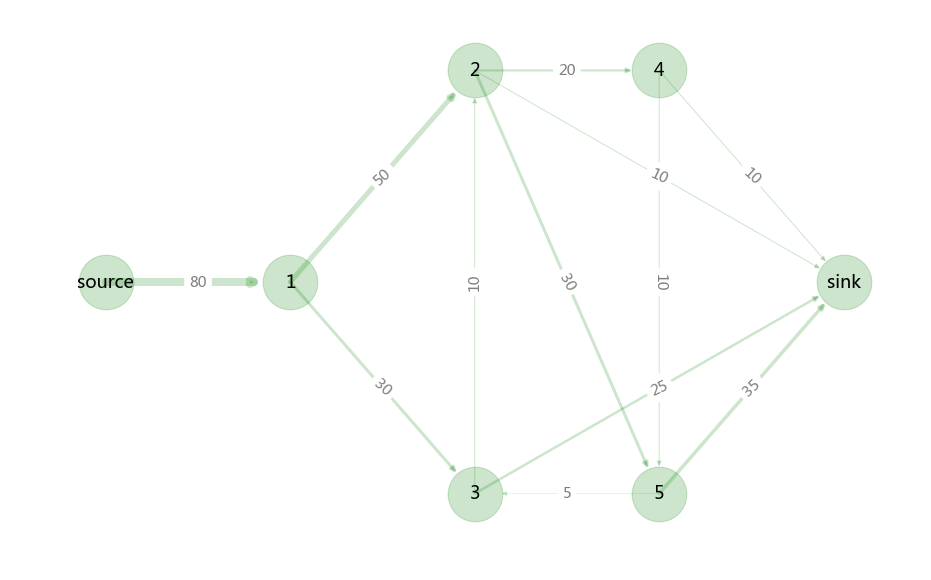

In [7]:
fig = plt.figure(figsize=(16, 10),facecolor='white')     
pos={1: np.array([ 0.2,  0.5]),
 2: np.array([ 0.4,  0.8]),
 3: np.array([ 0.4,  0.2 ]),
 4: np.array([ 0.6,  0.8]),
 5: np.array([ 0.6,  0.2]),
 'sink': np.array([ 0.8,  0.5]),
 'source': np.array([0,  0.5])}

width=[float(d['weight']*.1) for (u,v,d) in H.edges(data=True)]
edge_labels=dict([((u,v,),d['weight']) for u,v,d in H.edges(data=True)])
nx.draw_networkx_edge_labels(H,pos,edge_labels=edge_labels, font_size = 15,alpha = .5)
nx.draw(H, pos, node_size = 3000, node_color = 'green', 
        alpha = 0.2, width = width, edge_color='green',style='solid')
nx.draw_networkx_labels(H,pos,font_size=18)
plt.show() 


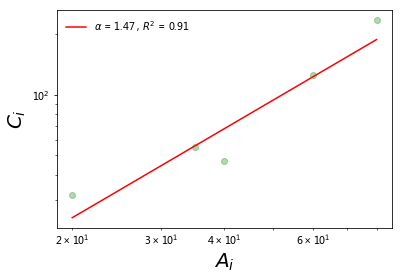

In [8]:
ai, ci = fn.getAICI(H)
fn.alloRegressPlot(ai,ci,'g','o','$A_i$','$C_i$', loglog=True)


# Demo Data

In [2]:
demo = fn.attention_data
demo

[['a', 0],
 ['a', 1],
 ['a', 2],
 ['b', 1],
 ['b', 2],
 ['c', 1],
 ['c', 2],
 ['c', 3],
 ['d', 2],
 ['d', 3],
 ['e', 0],
 ['e', 4],
 ['f', 0],
 ['f', 4],
 ['g', 0],
 ['g', 4],
 ['g', 5],
 ['h', 0],
 ['h', 5],
 ['i', 6]]

In [3]:
gd = fn.constructFlowNetwork(demo)

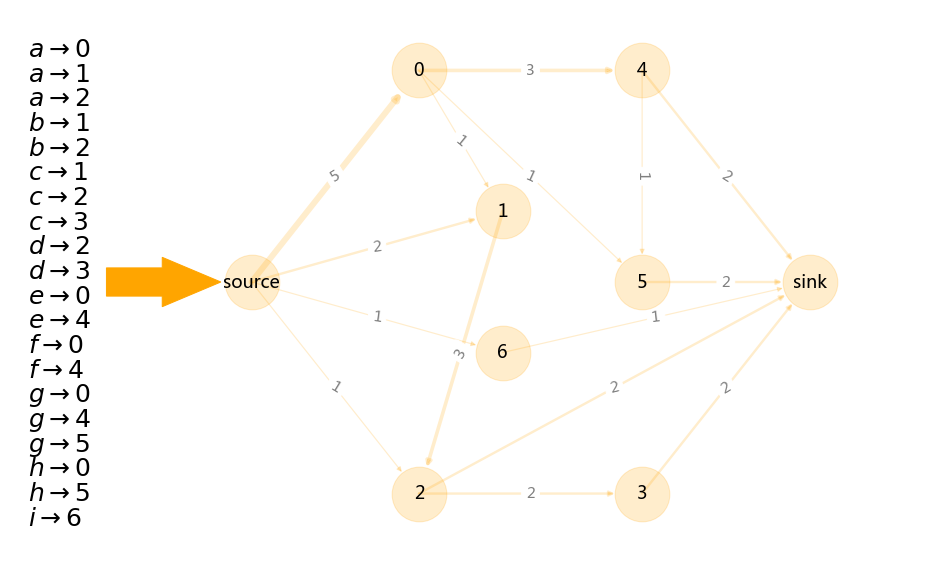

In [4]:
fig = plt.figure(figsize=(16, 10),facecolor='white')     
pos={0: np.array([ 0.6 ,  0.8]),
 2: np.array([ 0.6,  0.2]),
 1: np.array([ 0.75,  0.6]),
 6: np.array([ 0.75,  0.4]),
 4: np.array([ 1,  0.8]),
 5: np.array([ 1,  0.5]),
 3: np.array([ 1,  0.2 ]),
 'sink': np.array([ 1.3,  0.5]),
 'source': np.array([.3,  0.5])}
width=[float(d['weight']*1.2) for (u,v,d) in gd.edges(data=True)]
edge_labels=dict([((u,v,),d['weight']) for u,v,d in gd.edges(data=True)])
nx.draw_networkx_edge_labels(gd,pos,edge_labels=edge_labels, font_size = 15,alpha = .5)
nx.draw(gd, pos, node_size = 3000, node_color = 'orange', 
        alpha = 0.2, width = width, edge_color='orange',style='solid')
nx.draw_networkx_labels(gd,pos,font_size=18)
for k,  i in enumerate(demo):
    plt.text(-.1, .82-.035*k, '$%s  \\rightarrow  %i$' % (i[0], i[1]) , fontsize = 25)
plt.arrow(.04, .5,  .1, 0, color='orange', width=0.04, head_width = .07)   
plt.xlim(-.1, 1.5)
plt.show() 


In [5]:
nx.info(gd)

'Name: \nType: DiGraph\nNumber of nodes: 9\nNumber of edges: 15\nAverage in degree:   1.6667\nAverage out degree:   1.6667'

In [6]:
gh = fn.flowBalancing(gd)
nx.info(gh)

'Name: \nType: DiGraph\nNumber of nodes: 9\nNumber of edges: 15\nAverage in degree:   1.6667\nAverage out degree:   1.6667'

In [7]:
m = fn.getFlowMatrix(gd)
m

matrix([[0., 1., 0., 0., 3., 1., 0., 0., 0.],
        [0., 0., 3., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 2., 0., 0., 0., 2., 0.],
        [0., 0., 0., 0., 0., 0., 0., 2., 0.],
        [0., 0., 0., 0., 0., 1., 0., 2., 0.],
        [0., 0., 0., 0., 0., 0., 0., 2., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 2., 1., 0., 0., 0., 1., 0., 0.]])

In [8]:
M = fn.getMarkovMatrix(m)
M

array([[0.        , 0.2       , 0.        , 0.        , 0.6       ,
        0.2       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       , 0.        ,
        0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 0.        , 0.66666667, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],


In [9]:
U = fn.getUmatrix(gh)
U

matrix([[1.        , 0.2       , 0.2       , 0.1       , 0.6       ,
         0.4       , 0.        ],
        [0.        , 1.        , 1.        , 0.5       , 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 1.        , 0.5       , 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 1.        ,
         0.33333333, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 1.        ]])

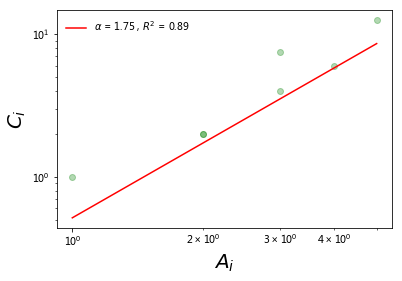

In [10]:
ai, ci = fn.getAICI(gh)
fn.alloRegressPlot(ai,ci,'g','o','$A_i$','$C_i$', loglog=True)


In [11]:
fn.networkDissipate(gh)

defaultdict(<function flownetwork.flownetwork3.networkDissipate.<locals>.<lambda>>,
            {0: [0, 5, 5],
             1: [0, 3, 2],
             2: [2, 4, 1],
             3: [2, 2, 0],
             4: [2, 3, 0],
             5: [2, 2, 0],
             6: [1, 1, 1]})

In [12]:
fn.flowDistanceFromSource(gd)

{0: 1.0,
 1: 1.333333333333333,
 2: 2.0,
 3: 3.0,
 4: 2.0,
 5: 2.5,
 6: 1.0,
 'sink': 3.2222222222222214}

In [13]:
fn.averageFlowLength(gd)

3.2222222222222223

# Visualization

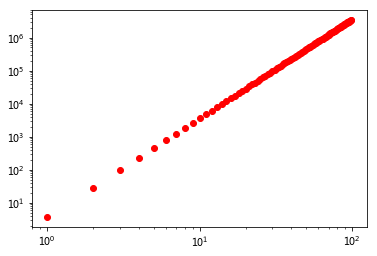

In [14]:
from random import random
x = np.array(range(1, 100))
y = (x+random()*x)**3

plt.plot(x, y, 'ro')
plt.xscale('log');plt.yscale('log')
plt.show()

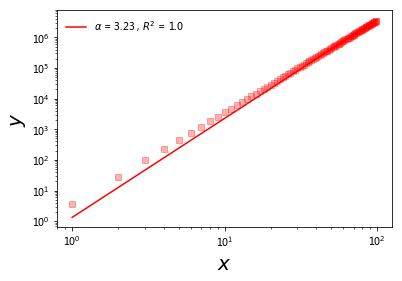

In [15]:
fn.alloRegressPlot(x,y,'r','s','$x$','$y$', loglog=True)

[-0.009930196250326817,
 -0.06476446056796445,
 -0.17705123513352666,
 0.8999984789404578]

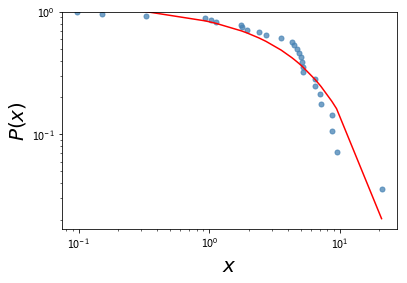

In [16]:
rg = np.array([ 20.7863444 ,   9.40547933,   8.70934714,   8.62690145,
     7.16978087,   7.02575052,   6.45280959,   6.44755478,
     5.16630287,   5.16092884,   5.15618737,   5.05610068,
     4.87023561,   4.66753197,   4.41807645,   4.2635671 ,
     3.54454372,   2.7087178 ,   2.39016885,   1.9483156 ,
     1.78393238,   1.75432688,   1.12789787,   1.02098332,
     0.92653501,   0.32586582,   0.1514813 ,   0.09722761])
fn.powerLawExponentialCutOffPlot(rg, '$x$', '$P(x)$')

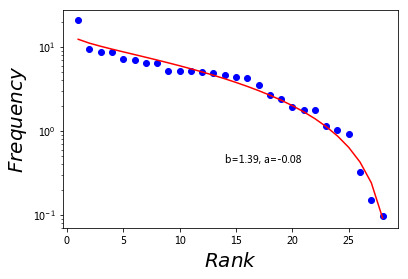

In [17]:
fn.DGBDPlot(rg)

Calculating best minimal value for power law fit


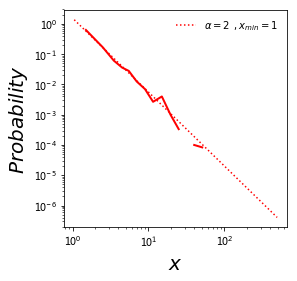

In [18]:
from networkx.utils import powerlaw_sequence
pl_sequence = powerlaw_sequence(1000,exponent=2.5)

fig = plt.figure(figsize=(4, 4),facecolor='white')
ax = fig.add_subplot(111)
fn.plotPowerlaw(pl_sequence,ax,'r','$x$')


Calculating best minimal value for power law fit


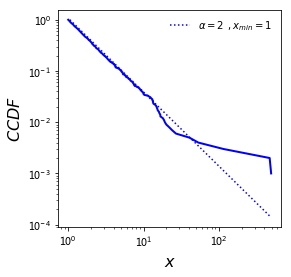

In [19]:
fig = plt.figure(figsize=(4, 4),facecolor='white')
ax = fig.add_subplot(111)
fn.plotCCDF(pl_sequence,ax,'b','$x$')


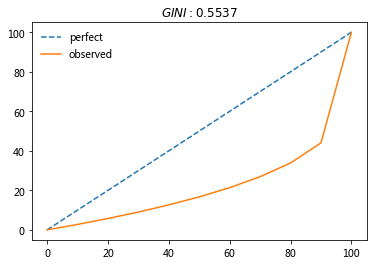

In [20]:
bins, result, gini_val = fn.gini_coefficient(np.array(pl_sequence))

plt.plot(bins, bins, '--', label="perfect")
plt.plot(bins, result, label="observed")
plt.title("$GINI: %.4f$" %(gini_val))

plt.legend(loc = 0, frameon = False)
plt.show()